In [1]:
#This project will help in discerning the user's emotional mindset
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

In [2]:
X_train, Y_train = read_csv('train_emoji.csv')
X_test, Y_test = read_csv('test_emoji.csv')

In [3]:
print(max(X_train, key=len))

I am so impressed by your dedication to this project


In [4]:
maxLen = len(max(X_train, key=len).split())

In [5]:
index=1
print(X_train[index], label_to_emoji(Y_train[index]))

I am proud of your achievements 😄


In [6]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [7]:
index=54
print(Y_train[index], "is converted into one hot", Y_oh_train[index])

4 is converted into one hot [0. 0. 0. 0. 1.]


In [8]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [11]:
print(word_to_vec_map)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
word = "master"
index = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(index) + "th word in the vocabulary is", index_to_word[index])

the index of master in the vocabulary is 236224
the 289846th word in the vocabulary is potatos


In [19]:
def sentence_to_avg(sentence, word_to_vec_map):
    words=(sentence.lower()).split()
    avg=np.zeros(50)
    for w in words:
        avg+=word_to_vec_map[w]
    avg=avg/len(words)
    return avg

In [21]:
avg=sentence_to_avg("Boys with good discipline are a very intelligent", word_to_vec_map)
print("avg = ",avg)

avg =  [ 0.0225825   0.20341545 -0.462395   -0.31647725  0.6742925   0.206834
 -0.21741737 -0.27491125 -0.21178287  0.16778612  0.01823837  0.18284125
 -0.2702025   0.07359662  0.09315812 -0.07400638  0.31757812  0.36413537
 -0.11423404 -0.63687418 -0.404103    0.51727125  0.15251125  0.17831025
  0.28359486 -1.39067125 -0.39070125  0.09233     0.23537337 -0.21152479
  3.2905875   0.27052875 -0.057302   -0.45295375  0.25746     0.18066638
  0.03511087  0.36342265 -0.11462616 -0.39799825 -0.1571025  -0.1370296
  0.05174375  0.5280415   0.34804612 -0.01390972 -0.01190275 -0.00810588
  0.11590512  0.271919  ]


In [32]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    np.random.seed()
    m=Y.shape[0]
    n_y=5
    n_h=50
    W=np.random.randn(n_y,n_h)/np.sqrt(n_h)
    b=np.zeros((n_y,))
    Y_oh=convert_to_one_hot(Y, C=n_y)
    
    for t in range(num_iterations):
        for i in range(m):
            avg=sentence_to_avg(X[i], word_to_vec_map)
            z=W@avg+b
            a=softmax(z)
            
            cost=-np.sum(Y_oh[i]*np.log(a))
            
            dz=a-Y_oh[i]
            dW=np.dot(dz.reshape(n_y,1),avg.reshape(1,n_h))
            db=dz
            
            W=W-learning_rate*dW
            b=b-learning_rate*db
            
        if t%100 == 0:
            print("Epoch:" + str(t) + "---- cost = "+ str(cost))
            pred=predict(X,Y,W,b,word_to_vec_map)
    return pred,W,b

In [33]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(X_train[0])
print(type(X_train))
Y=np.asarray([5,0,0,5, 4, 4, 4, 6, 6, 4, 1, 1, 5, 6, 6, 3, 6, 3, 4, 4])
print(Y.shape)

X = np.asarray(['I am going to the bar tonight', 'I love you', 'miss you my dear',
 'Lets go party and drinks','Congrats on the new job','Congratulations',
 'I am so happy for you', 'Why are you feeling bad', 'What is wrong with you',
 'You totally deserve this prize', 'Let us go play football',
 'Are you down for football this afternoon', 'Work hard play harder',
 'It is suprising how people can be dumb sometimes',
 'I am very disappointed','It is the best day in my life',
 'I think I will end up alone','My life is so boring','Good job',
 'Great so awesome'])

print(X.shape)
print(np.eye(5)[Y_train.reshape(-1)].shape)
print(type(X_train))


(132,)
(132,)
(132, 5)
never talk to me again
<class 'numpy.ndarray'>
(20,)
(20,)
(132, 5)
<class 'numpy.ndarray'>


In [34]:
pred ,W, b=model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch:0---- cost = 1.7608387107786534
Accuracy: 0.4015151515151515
Epoch:100---- cost = 0.07793898921497862
Accuracy: 0.9318181818181818
Epoch:200---- cost = 0.04564822811221425
Accuracy: 0.9621212121212122
Epoch:300---- cost = 0.03624438420848305
Accuracy: 0.9696969696969697
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [4.]
 [4.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [4.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [3.]
 [1.]
 [0

In [35]:
print("Training set:")
pred_train=predict(X_train, Y_train, W, b, word_to_vec_map)
print("Test set:")
pred_test=predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9772727272727273
Test set:
Accuracy: 0.875


In [36]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            2    0   16    0    0   18
3            1    1    2   12    0   16
4            0    0    0    0    7    7
All          9    9   18   13    7   56


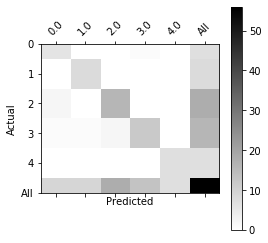

In [39]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)